In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ramil/Documents/UBA/(75.06) Organización de Datos/TPS/TP1/Entrenamieto_ECI_2020.csv')
df


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

# Cantidad de etapas mas  logradas

In [45]:

stage = df['Stage']
stage = stage.to_frame()

In [46]:
closed_won = stage['Stage'] == 'Closed Won'
closed_lost = stage['Stage'] == 'Closed Lost'
oportunidades_cerradas_ganadas = stage[closed_won] 
oportunidades_cerradas_perdidas = stage[closed_lost]
oportunidades_cerradas = oportunidades_cerradas_ganadas.append(oportunidades_cerradas_perdidas)
oportunidades_cerradas

,Stage
1,Closed Won
2,Closed Won
7,Closed Won
23,Closed Won
63,Closed Won
...,...
16938,Closed Lost
16940,Closed Lost
16941,Closed Lost
16945,Closed Lost


In [47]:
oportunidades_no_cerradas = stage.loc[stage['Stage'] != 'Closed Won']
oportunidades_no_cerradas = oportunidades_no_cerradas.loc[oportunidades_no_cerradas['Stage'] != 'Closed Lost']
oportunidades_no_cerradas

,Stage
7521,Proposal
13033,Proposal
14816,Qualification
14817,Qualification
14819,Proposal
...,...
16088,Qualification
16089,Proposal
16093,Proposal
16094,Proposal


Acá vamos a ver la relación entre oportunidades que se concretaron.


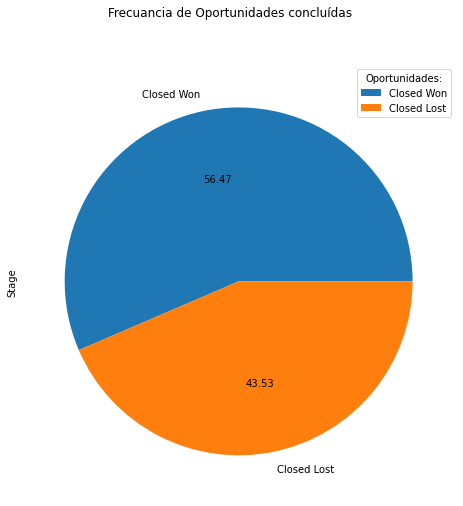

In [48]:
oportunidades_cerradas['Stage'].value_counts().plot(kind = 'pie', autopct='%1.2f', title = 'Frecuancia de Oportunidades concluídas', subplots = True, figsize = (10, 8))
plt.legend(title = 'Oportunidades:')

Acá veremos aquella que todavía no llegaron a concretarse

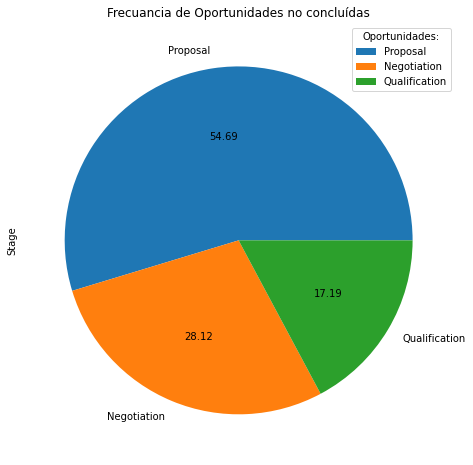

In [49]:
oportunidades_no_cerradas['Stage'].value_counts().plot(kind = 'pie', autopct='%1.2f',title = 'Frecuancia de Oportunidades no concluídas', figsize = (10, 8))
plt.legend(title = 'Oportunidades:')

# Cantidad de propuestas ganadas por territorio (top 10)

In [3]:

group = df[['Territory', 'Stage']]
group = group.loc[(group['Stage'] == 'Closed Won') & (group['Territory'] != 'None'), :].groupby('Territory').agg({'Stage':'count'})
territorio_mayor_propuetas_ganadas = group.sort_values('Stage', ascending = False)

territorio_mayor_propuetas_ganadas = territorio_mayor_propuetas_ganadas.nlargest(10, 'Stage')

territorio_mayor_propuetas_ganadas



,Stage
Territory,
Germany,1023
NW America,973
Australia,696
Japan,546
India,374
Singapore,357
NE America,259
Netherlands,257
China (PRC),202


Text(0.5, 0, 'Territorio')

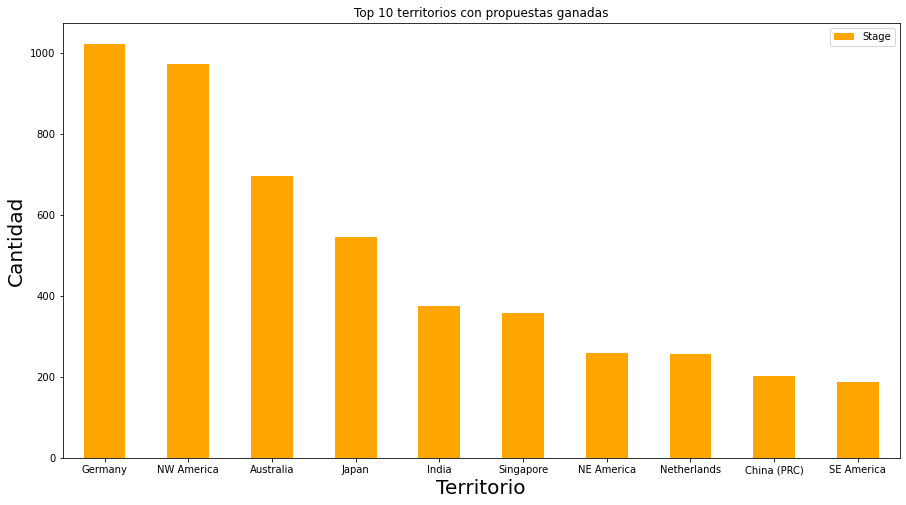

In [7]:
territorio_mayor_propuetas_ganadas.plot(kind = 'bar', title = 'Top 10 territorios con propuestas ganadas', linewidth = 5, figsize = (15, 8), rot = 0, color = 'orange');
ax = plt.gca()
ax.set_ylabel('Cantidad', fontsize = 20)
ax.set_xlabel('Territorio', fontsize = 20)

# Densidad de ventas en Alemania por mes según el año

In [16]:


ventas_en_alemania = df[['Territory','Month','Stage']]
ventas_en_alemania = ventas_en_alemania.loc[(ventas_en_alemania['Territory'] == 'Germany') & (ventas_en_alemania['Stage'] == 'Closed Won')]
"ventas_en_alemania = ventas_en_alemania[['Territory','Month']]"
ventas_en_alemania

,Territory,Month,Stage
63,Germany,2016 - 1,Closed Won
79,Germany,2016 - 5,Closed Won
80,Germany,2016 - 7,Closed Won
444,Germany,2016 - 8,Closed Won
668,Germany,2017 - 1,Closed Won
...,...,...,...
16933,Germany,2016 - 2,Closed Won
16934,Germany,2016 - 2,Closed Won
16935,Germany,2016 - 2,Closed Won
16936,Germany,2016 - 2,Closed Won


In [17]:
ventas_en_alemania['Month'] = pd.to_datetime(ventas_en_alemania['Month'])
ventas_en_alemania['Año'] = ventas_en_alemania['Month'].dt.year
ventas_en_alemania['Mes'] = ventas_en_alemania['Month'].dt.month
ventas_en_alemania = ventas_en_alemania.sort_values('Mes', ascending = True)
ventas_en_alemania

,Territory,Month,Stage,Año,Mes
63,Germany,2016-01-01,Closed Won,2016,1
9144,Germany,2018-01-01,Closed Won,2018,1
9225,Germany,2018-01-01,Closed Won,2018,1
9663,Germany,2018-01-01,Closed Won,2018,1
9665,Germany,2018-01-01,Closed Won,2018,1
...,...,...,...,...,...
16030,Germany,2018-12-01,Closed Won,2018,12
16031,Germany,2018-12-01,Closed Won,2018,12
15351,Germany,2018-12-01,Closed Won,2018,12
10785,Germany,2017-12-01,Closed Won,2017,12


In [18]:
"Cambio los numeros en Mes por sus nombres"
def mes(x):
    return calendar.month_name[int(x)]
ventas_en_alemania['Mes'] = ventas_en_alemania['Mes'].apply(mes)
ventas_en_alemania

,Territory,Month,Stage,Año,Mes
63,Germany,2016-01-01,Closed Won,2016,January
9144,Germany,2018-01-01,Closed Won,2018,January
9225,Germany,2018-01-01,Closed Won,2018,January
9663,Germany,2018-01-01,Closed Won,2018,January
9665,Germany,2018-01-01,Closed Won,2018,January
...,...,...,...,...,...
16030,Germany,2018-12-01,Closed Won,2018,December
16031,Germany,2018-12-01,Closed Won,2018,December
15351,Germany,2018-12-01,Closed Won,2018,December
10785,Germany,2017-12-01,Closed Won,2017,December


Text(0, 0.5, 'Cantidad de oportunidades')

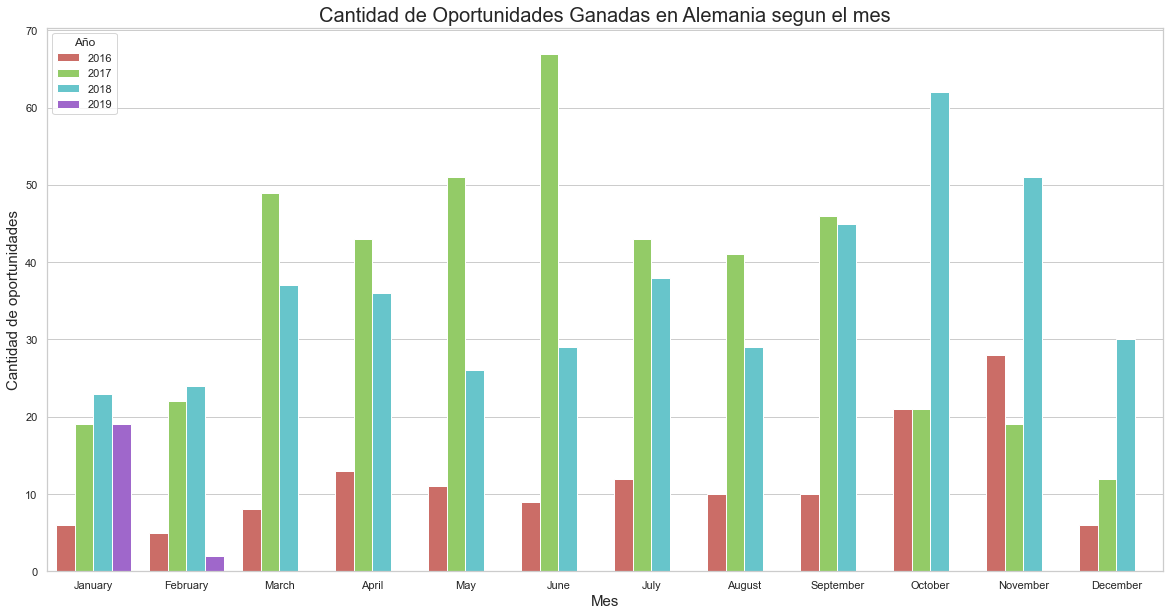

In [11]:
"Agrego estas lineas para setear lineas y tamaño del plot"
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)

g = sns.countplot(x="Mes", hue="Año", data=ventas_en_alemania, palette="hls")
g.set_title("Cantidad de Oportunidades Ganadas en Alemania segun el mes", fontsize=20)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de oportunidades", fontsize=15)

In [39]:
ventas_por_anio = ventas_en_alemania[['Año', 'Mes', 'Stage']]
ventas_por_anio = ventas_por_anio.loc[ventas_por_anio['Año'] != 2019]
ventas_por_anio

,Año,Mes,Stage
63,2016,January,Closed Won
9144,2018,January,Closed Won
9225,2018,January,Closed Won
9663,2018,January,Closed Won
9665,2018,January,Closed Won
...,...,...,...
16030,2018,December,Closed Won
16031,2018,December,Closed Won
15351,2018,December,Closed Won
10785,2017,December,Closed Won


In [40]:
ventas_por_anio_groupby = ventas_por_anio.groupby(['Mes', 'Año']).agg({'Stage':'count'})

In [41]:
ventas_por_anio = ventas_por_anio_groupby.reset_index()

In [42]:
ventas_por_anio = ventas_por_anio.pivot('Mes', 'Año', 'Stage')


Text(0.5, 1.0, 'Cantidad de Oportunidades Ganadas en Alemania segun el mes')

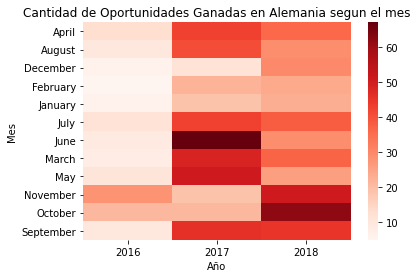

In [43]:
graf = sns.heatmap(ventas_por_anio, cmap = "Reds")
graf.set_title("Cantidad de Oportunidades Ganadas en Alemania segun el mes")